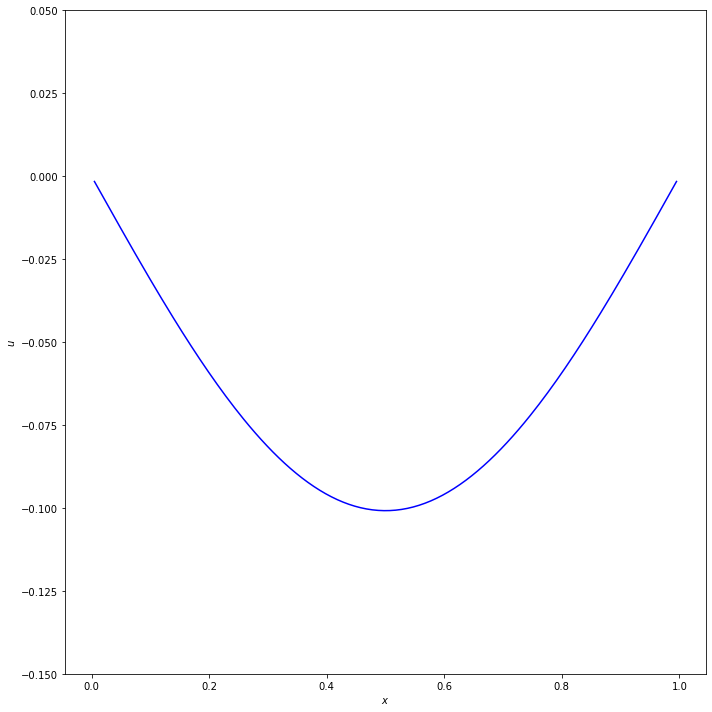

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

N=200
deltax = 1/(N+1) # calculamos paso espacial
alpha=1/deltax # elegimos alpha (del orden de N) sin preocuparnos de la estabilidad
v=np.empty(N) # arreglo que contiene la densidad (o lo que sea que difunde)
v_theo=np.empty(N) # arreglo que contiene el resultado teórico con que comparar
xs=np.empty(N) # arreglo de posiciones
A = np.empty((N,N)) # matriz tridiagonal que usaremos para sistema lineal
#########################################################

# creamos el vector v="b"
f = N/math.pi**2
for i in range(N):
    xs[i] = (i+1)*deltax
    v[i] = f*(2*np.sin(xs[i]*math.pi) - np.sin((xs[i]-deltax)*math.pi) - np.sin((xs[i]+deltax)*math.pi))
# creamos la matriz A
for i in range(N):
    for j in range(N):
        if i == j:
            A[i,j] = -2/deltax
        else:
            if abs(i-j) == 1:
                A[i,j] = 1/deltax
            else:
                A[i,j] = 0.
########################################################
# Para aplicar el método de eliminación de Gauss, en
# las siguiente 4 líneas dejamos la matriz A
# como una matriz diagonal superior, asumiendo que es 
# inicialmente tri-diagonal.
for j in range(N-2):    # j is the row index
    A[j+1,j+1] = (A[j+1,j+1]/A[j+1,j])*A[j,j] - A[j,j+1]
    A[j+1,j+2] = (A[j+1,j+2]/A[j+1,j])*A[j,j] - A[j,j+2]
A[N-1,N-1] = (A[N-1,N-1]/A[N-1,N-2])*A[N-2,N-2] - A[N-2,N-1]
############################################################
# Acá aplicamos al arreglo v las mismas operaciones lineales
# que se le aplicaron a la matriz A para dejarla como
# una matriz diagonal superior
for j in range(N-2):    # j is the row index
    v[j+1] = (v[j+1]/A[j+1,j])*A[j,j] - v[j]
j=N-2
v[N-1] = (v[N-1]/A[N-1,N-2])*A[N-2,N-2] - v[N-2]
###########################################################
# Y acá aplicamos la parte final del método de eliminación
# de Gauss. Notar que, dado que la matriz A es tri-diagonal,
# el número total de iteraciones del método de eliminación
# de Gauss es proporcional a N (no N^3).
v[N-1] = v[N-1]/A[N-1,N-1]
for j in range(N-1):
    v[N-2-j] = (v[N-2-j] - v[N-1-j]*A[N-2-j,N-1-j])/A[N-2-j,N-2-j] 
###########################################################
    
plt.figure(figsize=(10,10))
plt.xlabel('$x$')
plt.ylabel('$u$')
#        plt.xlim(0.6,0.7)
plt.ylim(-.15,.05)
plt.plot(xs,v,color='blue')#'bo', markersize=1)
plt.tight_layout()
plt.show()